# TEORIA DE CIÊNCIA DOS DADOS (até a aula 10)
___

## Bibliotecas

In [1]:
%matplotlib inline
import pandas as pd #importante para fazer analises de dataframes
import numpy as np #importante para realizar os cálculos
import matplotlib.pyplot as plt #importante para plotar os gráficos 
import itertools # importante para gerar todos os resultados possíveis!
from scipy import stats
from scipy.stats import uniform, expon, norm, probplot, percentileofscore
from random import randint

## Tipos de variáveis

1. QUALITATIVAS/CATEGÓRICAS
    * NOMINAIS - não possuem uma ordem natural entre seus elementos
    * ORDINAIS - possuem uma ordem intrínseca aos seus elementos

In [4]:
def Cria_Espaço_Amostral_Qualitativo(lista,n):
    list_quali = []
    i = 0
    while i<=n:
        choose = randint(0,len(lista)-1)
        list_quali.append(lista[choose])
        i+=1
    return pd.Series(list_quali)

In [5]:
quali_1 = ["Gosto", "Não gosto"]
QL1 = Cria_Espaço_Amostral_Qualitativo(quali_1,1024)
quali_2 = ["Macho", "Femea"]
QL2 = Cria_Espaço_Amostral_Qualitativo(quali_2,1024)

2. QUANTITATIVAS/NUMÉRICAS
    * DISCRETAS - são contagens
    * CONTINUAS - são mensurações

In [101]:
def Cria_Espaço_Amostral_Quantitativo(n):
    list_quanti = []
    i = 0
    while i<=(n-1):
        choose = randint(0,n)
        list_quanti.append(choose)
        i+=1
    i = 0
    list_quanti.append(1.8*n)
    list_quanti.append(1.5*n)
    list_quanti.append(1.2*n)
    return pd.Series(list_quanti)

In [102]:
QT1 = Cria_Espaço_Amostral_Quantitativo(10000)

## Recursos de análise/visualização

In [41]:
dt = ({
    'Qualitativa': ['Gráficos de Setor','Gráficos de Barra', 'Tabelas de Frequência'],
    'Quantitativa': ['Histograma','Boxplot', 'Tabelas de Frequência']
})
pd.DataFrame(dt, index=('','',''))

,Qualitativa,Quantitativa
,Gráficos de Setor,Histograma
,Gráficos de Barra,Boxplot
,Tabelas de Frequência,Tabelas de Frequência


## Cruzamentos entre variáveis

In [42]:
dt = ({
    'Qualitativa': ['CrossTab','NaN'],
    'Quantitativa': ['Grupos-Quali','Scatter']
})
pd.DataFrame(dt, index=('Qualitativa','Quantitativa'))

,Qualitativa,Quantitativa
Qualitativa,CrossTab,Grupos-Quali
Quantitativa,NaN,Scatter


## Gráficos de Barra (Qualitativos)
* variável.value_counts(True).plot(kind='bar')

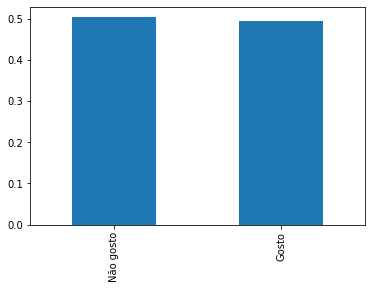

In [43]:
QL1.value_counts(True).plot(kind='bar');

## Gráficos de Setor (Qualitativos)
* variável.value_counts(True).plot(kind='pie')

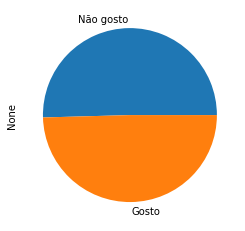

In [44]:
QL1.value_counts(True).plot(kind='pie');

## Tabela Cruzada ou Crosstab (Qualitativa)
* pd.crosstab(linha,coluna).plot(kind='bar',stacked=True)

In [45]:
Tabela = pd.DataFrame([QL1,QL2],index=['Tendência','Gênero']).T
Tabela.head(5)

,Tendência,Gênero
0,Não gosto,Macho
1,Gosto,Femea
2,Gosto,Macho
3,Não gosto,Femea
4,Gosto,Macho


In [46]:
pd.crosstab(Tabela.Tendência,Tabela.Gênero)

Gênero,Femea,Macho
Tendência,,
Gosto,258,250
Não gosto,264,253


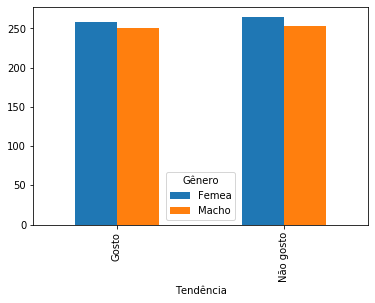

In [47]:
pd.crosstab(Tabela.Tendência,Tabela.Gênero).plot(kind='bar',stacked=False);

## Boxplot (Quantitativa)
* variável.plot(kind=box)

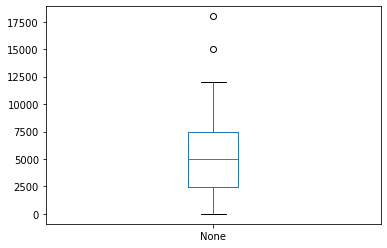

In [103]:
QT1.plot(kind='box');